# Projeto Simples de Treinamento de um Modelo Linear com o framework DVC
- https://dvc.org/

## O projeto terá as seguintes etapas:

- Gerar dados de entrada.
- Treinar um modelo simples (regressão linear).
- Controlar os arquivos de dados e resultados usando o DVC.

# Passo 1: Configuração do Ambiente
Certifique-se de ter o DVC e o Git instalados.

In [ ]:
! pip install dvc
! git init

# Passo 2: Inicializar o DVC

In [2]:
! dvc init
! git add .dvc .gitignore
! git commit -m "Inicializa o DVC no projeto"


Initialized DVC repository.

You can now commit the changes to git.

+---------------------------------------------------------------------+
|                                                                     |
|        DVC has enabled anonymous aggregate usage analytics.         |
|     Read the analytics documentation (and how to opt-out) here:     |
|             <https://dvc.org/doc/user-guide/analytics>              |
|                                                                     |
+---------------------------------------------------------------------+

What's next?
------------
- Check out the documentation: <https://dvc.org/doc>
- Get help and share ideas: <https://dvc.org/chat>
- Star us on GitHub: <https://github.com/iterative/dvc>


fatal: pathspec '.gitignore' did not match any files


[master (root-commit) 16326b4] Inicializa o DVC no projeto
 Committer: Nielsen Castelo Damasceno Dantas <nielsen.castelo@inatel.br>
Your name and email address were configured automatically based
on your username and hostname. Please check that they are accurate.
You can suppress this message by setting them explicitly:

    git config --global user.name "Your Name"
    git config --global user.email you@example.com

After doing this, you may fix the identity used for this commit with:

    git commit --amend --reset-author

 3 files changed, 6 insertions(+)
 create mode 100644 .dvc/.gitignore
 create mode 100644 .dvc/config
 create mode 100644 .dvcignore


# Passo 3: Criar Dados Simulados
Crie um script Python para gerar dados.

In [3]:
import pandas as pd
import numpy as np


np.random.seed(42)
x = np.random.rand(100, 1)
y = 3 * x[:, 0] + np.random.randn(100)

data = pd.DataFrame({'x': x[:, 0], 'y': y})
data.to_csv('data.csv', index=False)
print("Dados salvos em data.csv")


Dados salvos em data.csv


In [4]:
data

,x,y
0,0.374540,1.210667
1,0.950714,2.553136
2,0.731994,2.287743
3,0.598658,-0.191593
4,0.156019,0.248384
...,...,...
95,0.493796,0.665577
96,0.522733,1.491097
97,0.427541,1.623775
98,0.025419,0.352948


# Passo 4: Adicionar os Dados ao DVC
Rode o script e adicione os dados ao controle de versão.

In [5]:
! python generate_data.py
! dvc add data.csv


Dados salvos em data.csv

To track the changes with git, run:

	git add data.csv.dvc .gitignore

To enable auto staging, run:

	dvc config core.autostage true


⠋ Checking graph



O comando cria um arquivo data.csv.dvc que controla os dados.

Adicione ao Git:

In [6]:
! git add data.csv.dvc .gitignore
! git commit -m "Adiciona dados simulados com DVC"


[master 7875677] Adiciona dados simulados com DVC
 Committer: Nielsen Castelo Damasceno Dantas <nielsen.castelo@inatel.br>
Your name and email address were configured automatically based
on your username and hostname. Please check that they are accurate.
You can suppress this message by setting them explicitly:

    git config --global user.name "Your Name"
    git config --global user.email you@example.com

After doing this, you may fix the identity used for this commit with:

    git commit --amend --reset-author

 2 files changed, 6 insertions(+)
 create mode 100644 .gitignore
 create mode 100644 data.csv.dvc


# Passo 5: Treinar o Modelo
- Crie um script para treinar um modelo.
- Arquivo: train_model.py

In [7]:

import pandas as pd
from sklearn.linear_model import LinearRegression
import joblib

# Carregar os dados
data = pd.read_csv('data.csv')
X = data[['x']].values
y = data['y'].values

# Treinar modelo
model = LinearRegression()
model.fit(X, y)

# Salvar o modelo
joblib.dump(model, 'model.pkl')
print("Modelo salvo em model.pkl")


Modelo salvo em model.pkl


# Passo 6: Adicionar o Modelo ao DVC
Execute o treinamento e adicione o modelo ao DVC.

In [8]:
! python train_model.py
! dvc add model.pkl


Modelo salvo em model.pkl

To track the changes with git, run:

	git add model.pkl.dvc .gitignore

To enable auto staging, run:

	dvc config core.autostage true


⠋ Checking graph



Adicione ao Git:

In [9]:
! git add model.pkl.dvc .gitignore
! git commit -m "Adiciona modelo treinado com DVC"


[master be681d6] Adiciona modelo treinado com DVC
 Committer: Nielsen Castelo Damasceno Dantas <nielsen.castelo@inatel.br>
Your name and email address were configured automatically based
on your username and hostname. Please check that they are accurate.
You can suppress this message by setting them explicitly:

    git config --global user.name "Your Name"
    git config --global user.email you@example.com

After doing this, you may fix the identity used for this commit with:

    git commit --amend --reset-author

 2 files changed, 6 insertions(+)
 create mode 100644 model.pkl.dvc


# Passo 7: Criar um Pipeline DVC
Para automatizar as etapas, crie um pipeline.

In [10]:
! dvc stage add -n generate_data -d generate_data.py -o data.csv python generate_data.py
! dvc stage add -n train_model -d train_model.py -d data.csv -o model.pkl python train_model.py


ERROR: output 'data.csv' is already specified in stage: 'data.csv.dvc'.
Use `dvc remove data.csv.dvc` to stop tracking the overlapping output.
ERROR: output 'model.pkl' is already specified in stage: 'model.pkl.dvc'.
Use `dvc remove model.pkl.dvc` to stop tracking the overlapping output.


# Passo 8: Executar e Visualizar o Pipeline
Execute o pipeline completo com:

In [11]:
! dvc repro

ERROR: 'e:\Inatel\Projetos\test_dvc\dvc.yaml' does not exist


Visualize o status:

In [12]:
! dvc dag

+--------------+ 
| data.csv.dvc | 
+--------------+ 
+---------------+  
| model.pkl.dvc |  
+---------------+  


# Passo 9: Armazenar e Compartilhar os Dados
Envie os dados para um armazenamento remoto (ex.: AWS S3, Google Drive):

In [ ]:
! dvc remote add -d myremote <URL_DO_STORAGE>
! dvc push

Adicione as mudanças ao Git:

In [ ]:
! git add .dvc/config
! git commit -m "Configura o armazenamento remoto"
! git push

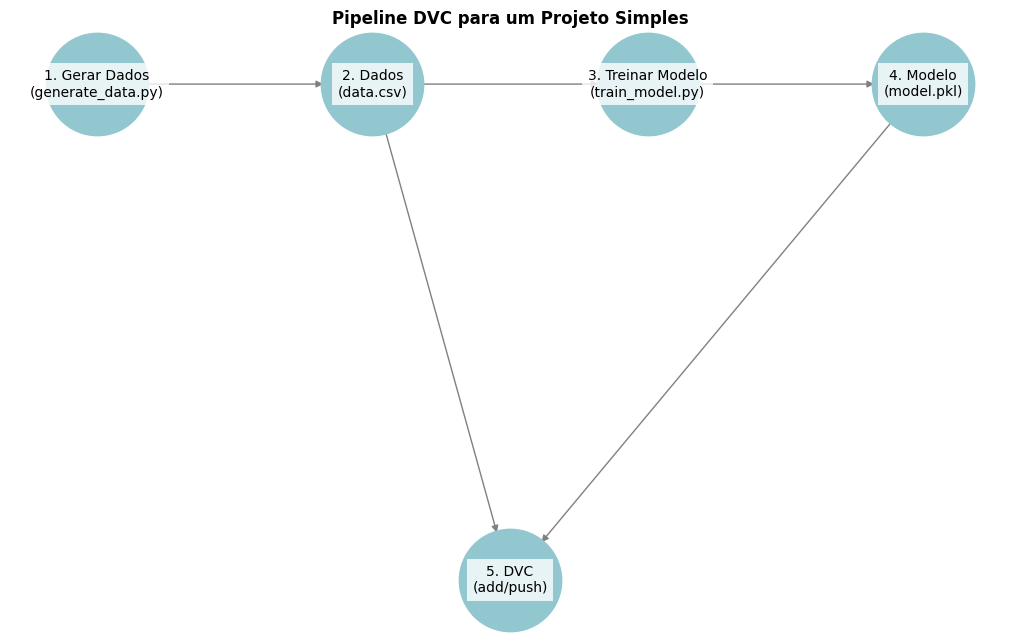

In [13]:
import matplotlib.pyplot as plt
import networkx as nx

# Criação do grafo do pipeline
G = nx.DiGraph()

# Nós do pipeline
G.add_node("generate_data", label="1. Gerar Dados\n(generate_data.py)")
G.add_node("data.csv", label="2. Dados\n(data.csv)")
G.add_node("train_model", label="3. Treinar Modelo\n(train_model.py)")
G.add_node("model.pkl", label="4. Modelo\n(model.pkl)")
G.add_node("dvc add/push", label="5. DVC\n(add/push)")

# Conexões entre os nós
G.add_edges_from([
    ("generate_data", "data.csv"),
    ("data.csv", "train_model"),
    ("train_model", "model.pkl"),
    ("data.csv", "dvc add/push"),
    ("model.pkl", "dvc add/push")
])

# Layout do pipeline
pos = {
    "generate_data": (0, 2),
    "data.csv": (2, 2),
    "train_model": (4, 2),
    "model.pkl": (6, 2),
    "dvc add/push": (3, 0)
}

# Ajustando os rótulos para evitar sobreposição usando `bbox`

# plt.figure(figsize=(10, 6))
# nx.draw(G, pos, with_labels=False, node_size=3000, node_color="#FFDDC1", edge_color="gray")

# Adicionar rótulos personalizados com fundo
labels = {n: d['label'] for n, d in G.nodes(data=True)}

# Ajustando o tamanho dos vértices e alterando as cores
plt.figure(figsize=(10, 6))

# Desenho dos nós e arestas
nx.draw(G, pos, with_labels=False, node_size=5000, node_color="#92C7CF", edge_color="gray", linewidths=4)

# Adicionar rótulos personalizados com fundo branco
for node, (x, y) in pos.items():
    plt.text(
        x, y, labels[node], 
        fontsize=10, ha="center", va="center", bbox=dict(facecolor='white', alpha=0.8, edgecolor='none')
    )

plt.title("Pipeline DVC para um Projeto Simples", fontsize=12, fontweight="bold")
plt.axis("off")
plt.show()

